In [1]:

%matplotlib widget
import matplotlib.pyplot as plt
from polygonal_roadmaps import pathfinding
import networkx as nx
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Range1d, Plot
from bokeh.plotting import from_networkx
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine, WheelZoomTool, PanTool
from bokeh.transform import linear_cmap, factor_cmap


output_notebook()



Loading BokehJS ...

In [2]:
G = pathfinding.gen_example_graph(5,2)
pos = nx.get_node_attributes(G, 'pos')

In [3]:
pathfinding.spatial_astar(G, 'a', 'e')

['a', 'b', 'c', 'd', 'e']

In [4]:
# We could use figure here but don't want all the axes and titles
plot = figure()
#plot.add_tools(WheelZoomTool(), PanTool())

# Create a Bokeh graph from the NetworkX input using nx.spring_layout

graph = from_networkx(G, pos)
plot.renderers.append(graph)

# Set some of the default node glyph (Circle) properties
graph.node_renderer.glyph.update(radius=.1)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips="@index"))

show(plot)

In [10]:
cost = pathfinding.compute_cost(G, 'e')
path, temporal_graph = pathfinding.spacetime_astar(G, 'a', 'e', cost, node_constraints=[('b', 1)], limit=10, return_graph=True)
path

TypeError: spacetime_astar() got an unexpected keyword argument 'return_graph'

In [6]:
# We could use figure here but don't want all the axes and titles
plot = figure()
#plot.add_tools(WheelZoomTool(), PanTool())

# Create a Bokeh graph from the NetworkX input using nx.spring_layout

graph = from_networkx(temporal_graph, nx.multipartite_layout, subset_key='t')
plot.renderers.append(graph)

# Set some of the default node glyph (Circle) properties
graph.node_renderer.glyph.update(radius=.1, fill_color=linear_cmap('cost', 'Viridis256', 0, 15))

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips="@index, cost: @cost"))

show(plot)

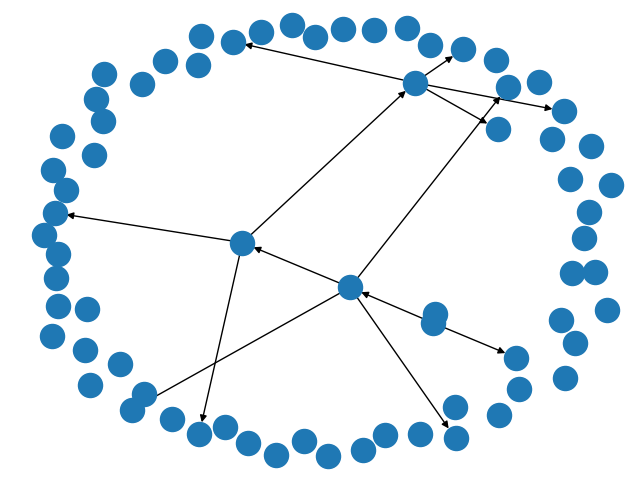

In [7]:
nx.draw(temporal_graph)

In [8]:
t = nx.DiGraph()
t.add_nodes_from(pathfinding.temporal_node_list(G, 3, []))

In [9]:
t.nodes()

NodeView(('nat0', 'nbt0', 'nct0', 'ndt0', 'net0', 'nft0', 'ngt0', 'nat1', 'nbt1', 'nct1', 'ndt1', 'net1', 'nft1', 'ngt1', 'nat2', 'nbt2', 'nct2', 'ndt2', 'net2', 'nft2', 'ngt2'))